In [218]:
import cv2 as cv
import os
import numpy
# Tensorflow Imports
import tensorflow as tf
import tensorflow.keras as keras
#Plotting Library Imports
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [219]:
# Setting up directory paths
test_data = "../dataset/Testing"
train_data = "../dataset/Training"

In [220]:
#Fetching Training Dataset Using Tensorflow
train_dataset= keras.preprocessing.image_dataset_from_directory(
                                                                directory=train_data,
                                                                batch_size= 32,
                                                                label_mode="int"
)
print(len(train_dataset))


Found 5521 files belonging to 4 classes.
173


In [221]:
#Fetching Testing Dataset Using Tensorflow 
test_dataset = keras.preprocessing.image_dataset_from_directory(
    directory=test_data,
    batch_size = 32,
    label_mode="int"
)

Found 1205 files belonging to 4 classes.


In [222]:
dataset_classes = train_dataset.class_names
dataset_classes

['glioma', 'meningioma', 'notumor', 'pituitary']

# Distribution Analysis: 
From the bar plots, we can see that the distribution of the classes/tumor images are roughly balanced, which is crucial for reducing the bias in our model for certain types of tumors. An imbalanced dataset leads to the model being unable to correctly classify images for the lower distribution tumor class, which can lead to generation of false positives as a different tumor.

In [223]:
# Getting Class Distribution
def get_count(path: str)-> dict[int]:
    subdirs = [f.path for f in os.scandir(path) if f.is_dir()]
    counts = {}
    for i in subdirs:
        counts[i[len(path) + 1: ]] = len(os.listdir(i))
    return counts
train_counts = get_count(train_data)
test_counts = get_count(test_data)
print(train_counts)
print(test_counts)

{'pituitary': 1445, 'meningioma': 1333, 'glioma': 1321, 'notumor': 1422}
{'pituitary': 295, 'meningioma': 302, 'glioma': 299, 'notumor': 309}


In [224]:
train_count = sum(train_counts.values())
test_count = sum(test_counts.values())
print(f"Dataset Distribution\nTraining Data: {train_count*100/(train_count+test_count):.2f}%\nTesting Data: {test_count*100/(train_count+test_count):.2f}%")

Dataset Distribution
Training Data: 82.08%
Testing Data: 17.92%


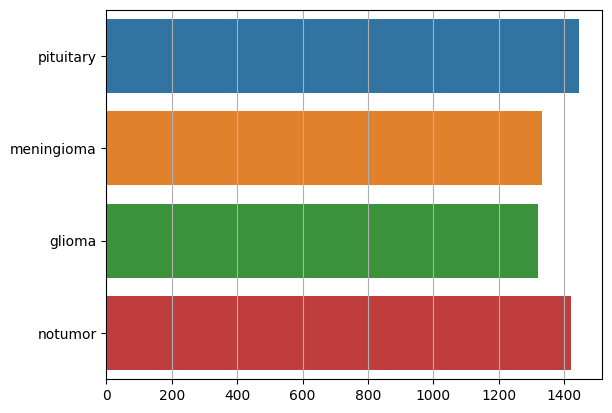

In [225]:
sns.barplot(train_counts, x=train_counts.values(), y=train_counts.keys(), hue=train_counts.keys(), legend=False, orient="h")
plt.grid(axis="x")
plt.show()

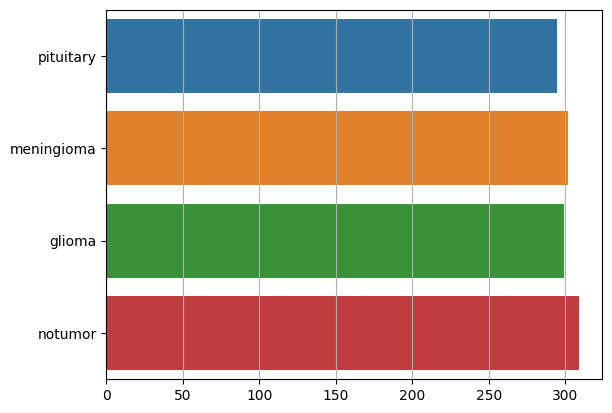

In [226]:
sns.barplot(test_counts, x=test_counts.values(),y=test_counts.keys(),hue = test_counts.keys(), orient="h")
plt.grid(axis="x")
plt.show()

# Image Analysis

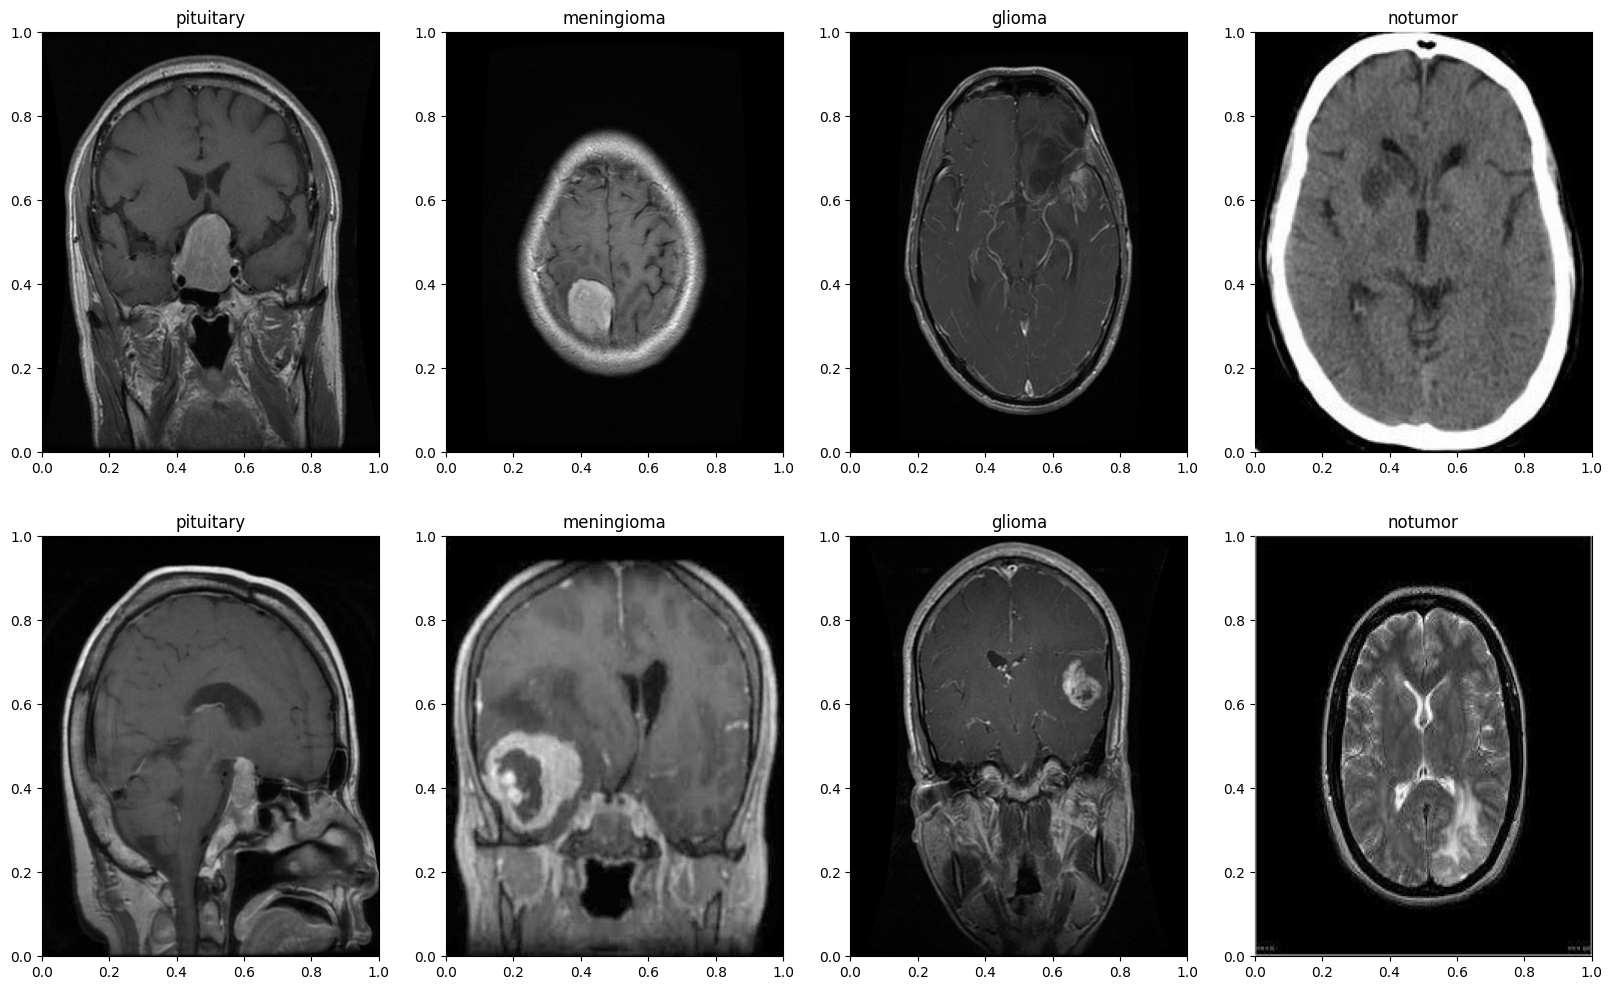

In [227]:
images = [cv.imread(train_data+"/"+i+"/"+os.listdir(train_data+"/"+i)[0]) for i in os.listdir(train_data)]
test = [cv.imread(test_data+"/"+i+"/"+os.listdir(test_data+"/"+i)[0]) for i in os.listdir(test_data)]
for i in test:
    images.append(i)
fig, ax = plt.subplots(2,4,figsize=(20,12))
for i in range(1, 9):
    fig.add_subplot(2, 4, i)
    idx = i - 1
    plt.imshow(images[idx].astype("uint8"), aspect="auto")
    plt.axis("off")
for i in ax:
    c = 0
    for j in i:
        j.title.set_text(labels[c])
        c+=1

In [228]:
# Getting resolution of images in each class
# Initialize storage for resolutions
class_resolutions = {}
class_counts = {}

# Iterate over dataset batches
for images, labels in train_dataset:
    # Iterate over individual images in the batch
    for img, label in zip(images, labels):
        # Get image resolution (height, width)
        height, width = tf.shape(img)[0], tf.shape(img)[1]
        label = int(label.numpy())  # Convert label tensor to integer

        # Initialize storage for the class if not already done
        if label not in class_resolutions:
            class_resolutions[label] = [0, 0]  # Sum of heights, widths
            class_counts[label] = 0

        # Accumulate resolutions and count
        class_resolutions[label][0] += int(height)
        class_resolutions[label][1] += int(width)
        class_counts[label] += 1

# Compute average resolution for each class
average_resolutions = {
    label: (res[0] / class_counts[label], res[1] / class_counts[label]) 
    for label, res in class_resolutions.items()
}

# Display results
for label, avg_res in average_resolutions.items():
    print(f"Class {label}: Average Resolution = {avg_res[0]:.2f} x {avg_res[1]:.2f}")

Class 1: Average Resolution = 256.00 x 256.00
Class 3: Average Resolution = 256.00 x 256.00
Class 0: Average Resolution = 256.00 x 256.00
Class 2: Average Resolution = 256.00 x 256.00
